In [1]:
import sklearn as sk
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

from numpy import argmax
import numpy as np

In [2]:
X, y = make_classification(n_samples= 1000, n_classes= 2, random_state= 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2)

In [4]:
model = LogisticRegression().fit(X_train, y_train)

In [5]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

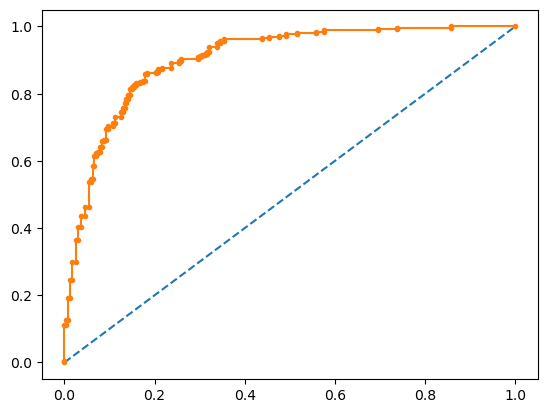

In [7]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

In [8]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [9]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

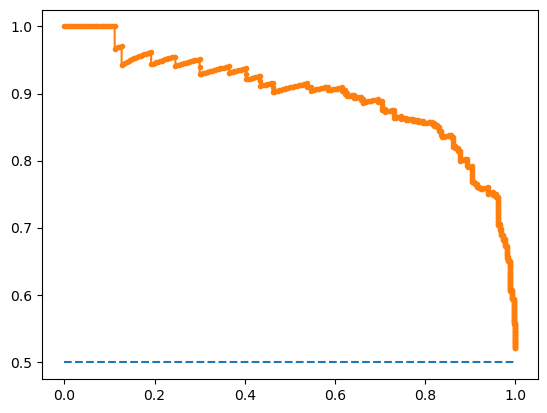

In [10]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(recall, precision, marker= ".")
plt.show()

In [11]:
auc(recall, precision)

0.8977244980325834

In [12]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



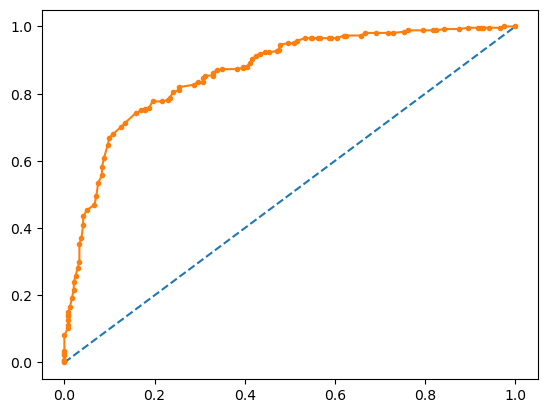

In [13]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

In [14]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [15]:
X, y = make_classification(n_samples= 1000, n_classes= 2, weights= [0.99, 0.01], random_state= 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2, stratify= y)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [17]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [18]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



D:\Conda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Conda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Conda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


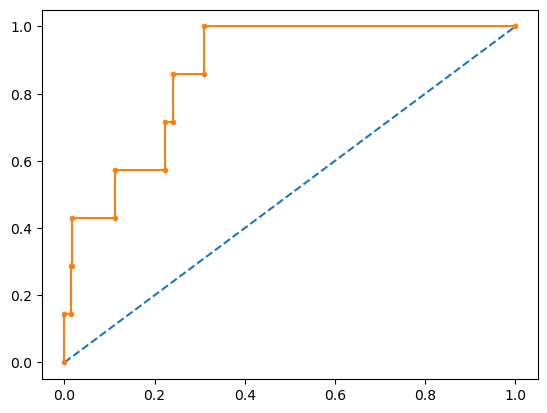

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

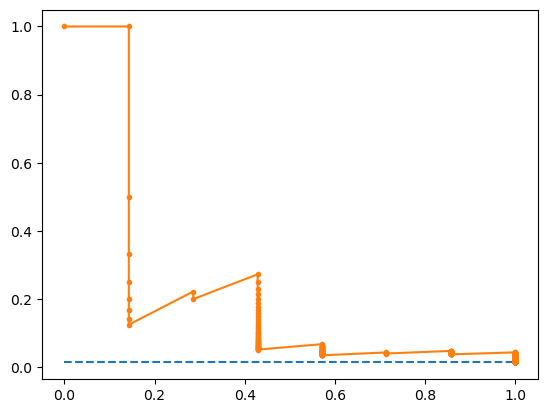

In [20]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(recall, precision, marker= ".")
plt.show()

In [21]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, weights= [0.99, 0.01], random_state= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2, stratify= y)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

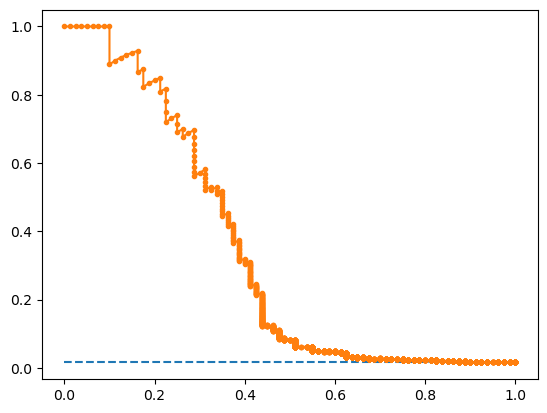

In [22]:
p, r, pr_tresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.show()

In [23]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("Порог=%f, F-Score=%.3f" % (pr_tresholds[ix], f1[ix]))

Порог=0.163799, F-Score=0.418


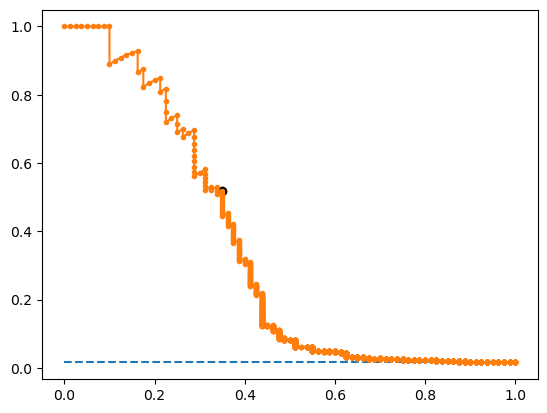

In [24]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.scatter(r[ix], p[ix], marker= "o", color= "black")
plt.show()

In [25]:
y_pred = (y_pred_proba[:, 1] > pr_tresholds[ix]).astype("int")

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.51      0.34      0.41        80

    accuracy                           0.98      5000
   macro avg       0.75      0.67      0.70      5000
weighted avg       0.98      0.98      0.98      5000



In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.93      0.16      0.28        80

    accuracy                           0.99      5000
   macro avg       0.96      0.58      0.63      5000
weighted avg       0.99      0.99      0.98      5000



# Задания

№1 Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

Сначала проведём анализ с двумерным датасетом без дизбаланса классов

In [28]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, n_features= 2, n_informative= 2, n_redundant= 0, n_repeated= 0, n_clusters_per_class= 1)

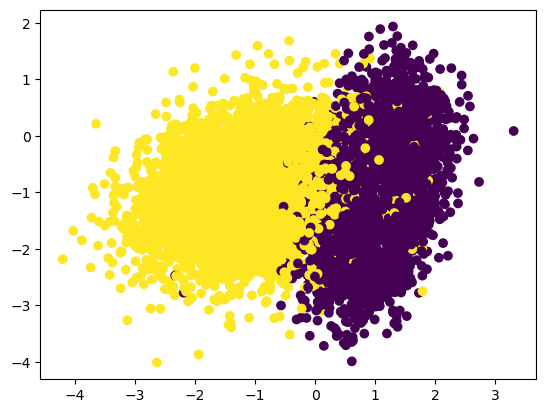

In [29]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=4992, Class1=5008
Обучающая: Class0=2491, Class1=2509
Тестовая: Class0=2501, Class1=2499


In [31]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [32]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

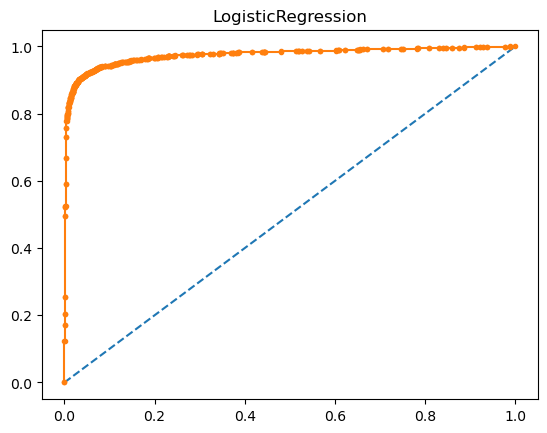

In [33]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("LogisticRegression")
plt.show()

ROC-AUC LogisticRegression:

In [34]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9746025559364089

In [35]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

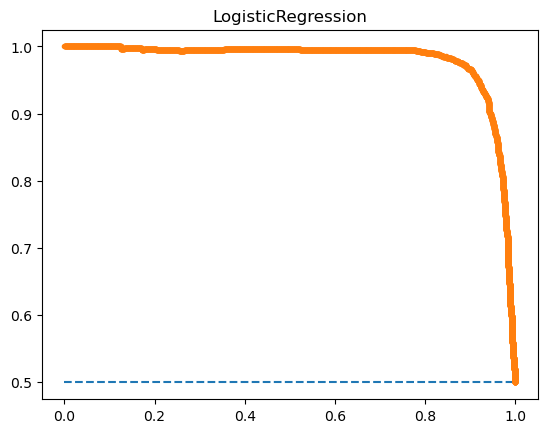

In [36]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.title("LogisticRegression")
plt.show()

PR-AUC LogisticRegression:

In [37]:
auc(r, p)

0.9789292166176294

In [38]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)

In [39]:
y_pred2_proba = model2.predict_proba(X_test)

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

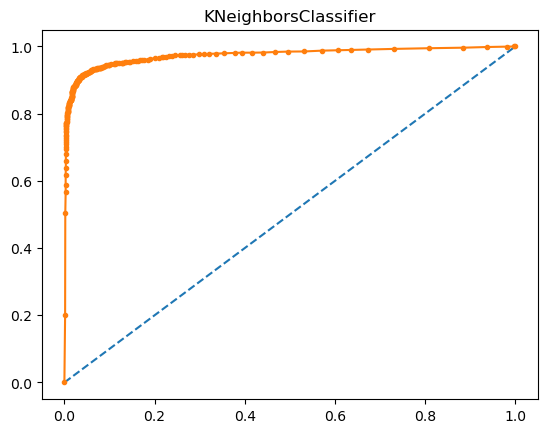

In [41]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

ROC-AUC KNeighborsClassifier:

In [42]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.9741375158620025

In [43]:
p2, r2, pr2_thresholds = precision_recall_curve(y_test, y_pred2_proba[:, 1])

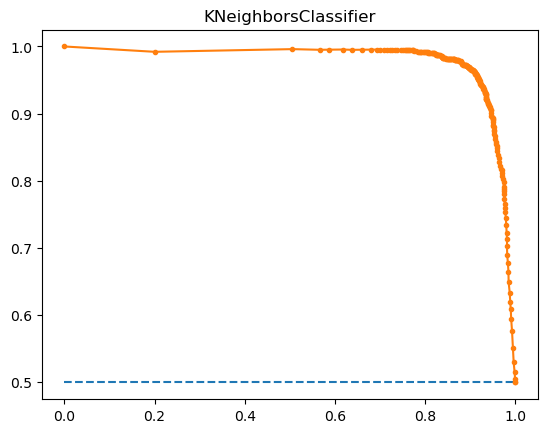

In [44]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r2, p2, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

PR-AUC KNeighborsClassifierPR-AUC:

In [45]:
auc(r2, p2)

0.9778916851909198

Найдём оптимальное значение порога для датасета без дизбаланса классов:

In [46]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("LogisticRegression:\nПорог=%f, F-Score=%.3f\n" % (pr_thresholds[ix], f1[ix]))

f1_2 = (2 * p2 * r2) / (p2 + r2)
ix_2 = argmax(f1_2)
print("KNeighborsClassifier:\nПорог=%f, F-Score=%.3f" % (pr2_thresholds[ix_2], f1_2[ix_2]))

LogisticRegression:
Порог=0.484740, F-Score=0.934

KNeighborsClassifier:
Порог=0.448000, F-Score=0.935


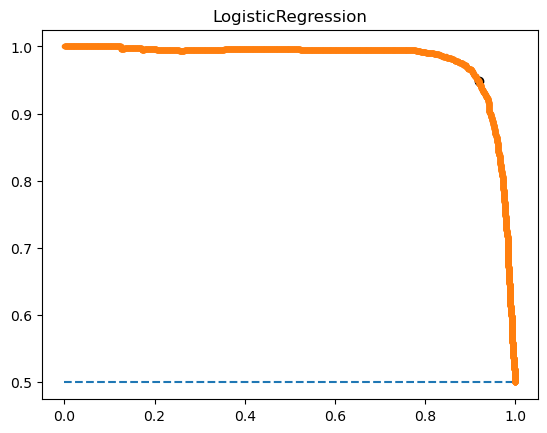

In [47]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

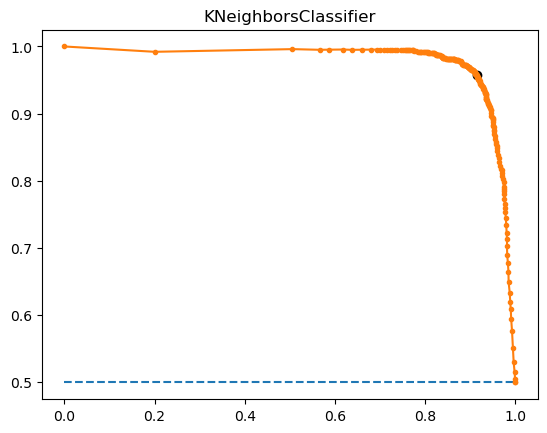

In [48]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix_2], p2[ix_2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [49]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_thresholds[ix_2]).astype('int')

Отчёт о классификации при оптимальном значении порога (LogisticRegression)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2501
           1       0.95      0.92      0.93      2499

    accuracy                           0.93      5000
   macro avg       0.94      0.93      0.93      5000
weighted avg       0.94      0.93      0.93      5000



Отчёт о классификации при оптимальном значении порога (KNeighborsClassifier)

In [51]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2501
           1       0.96      0.91      0.94      2499

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



Проведём анализ двумерного датасета с дизбалансом классов

In [52]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, n_features= 2, n_informative= 2, n_redundant= 0, n_repeated= 0, weights= [0.99, 0.01], n_clusters_per_class= 1)

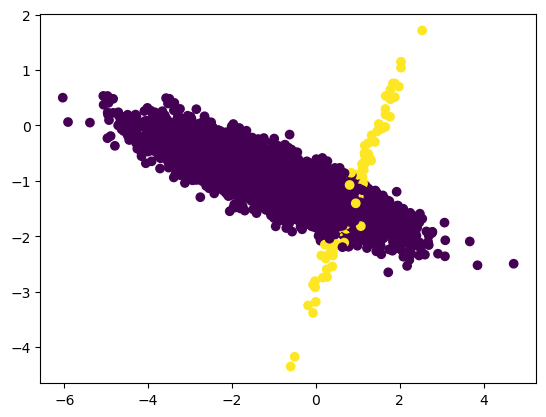

In [53]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, stratify= y)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=9847, Class1=153
Обучающая: Class0=4924, Class1=76
Тестовая: Class0=4923, Class1=77


In [55]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

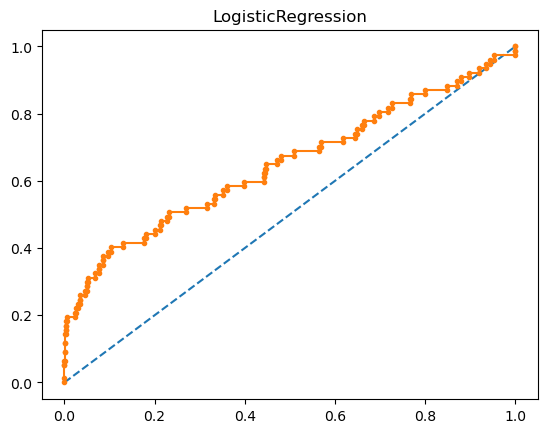

In [57]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("LogisticRegression")
plt.show()

ROC-AUC LogisticRegression:

In [58]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.6505034676881113

In [59]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

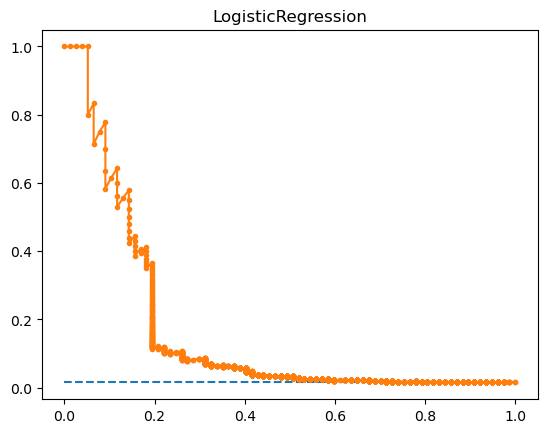

In [60]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.title("LogisticRegression")
plt.show()

PR-AUC LogisticRegression:

In [61]:
auc(r, p)

0.16319255637349955

In [62]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)

In [63]:
y_pred2_proba = model2.predict_proba(X_test)

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

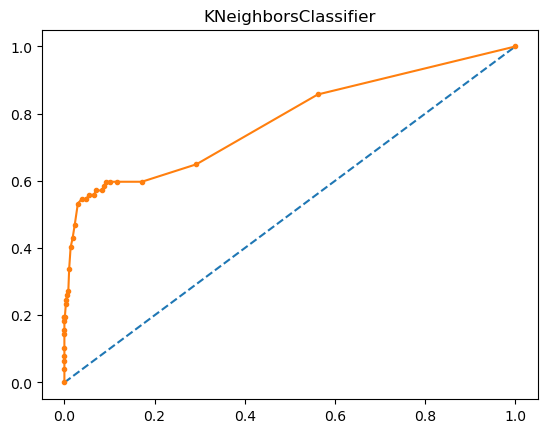

In [65]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

ROC-AUC KNeighborsClassifier:

In [66]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.7786931735743436

In [67]:
p2, r2, pr2_thresholds = precision_recall_curve(y_test, y_pred2_proba[:, 1])

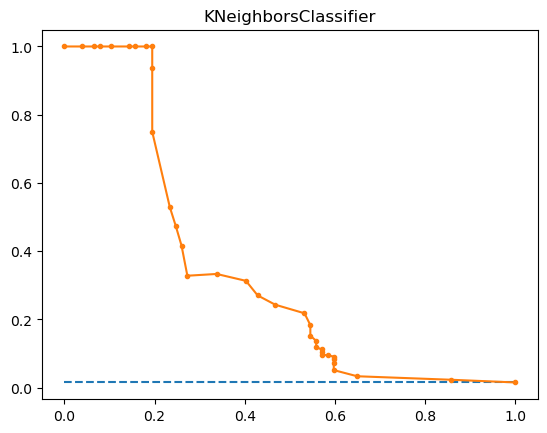

In [68]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r2, p2, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

PR-AUC KNeighborsClassifierPR-AUC:

In [69]:
auc(r2, p2)

0.3312238507026131

Найдём оптимальное значение порога для датасета с дизбаланса классов:

In [70]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("LogisticRegression:\nПорог=%f, F-Score=%.3f\n" % (pr_thresholds[ix], f1[ix]))

f1_2 = (2 * p2 * r2) / (p2 + r2)
ix_2 = argmax(f1_2)
print("KNeighborsClassifier:\nПорог=%f, F-Score=%.3f" % (pr2_thresholds[ix_2], f1_2[ix_2]))

LogisticRegression:
Порог=0.118445, F-Score=0.254

KNeighborsClassifier:
Порог=0.072000, F-Score=0.352


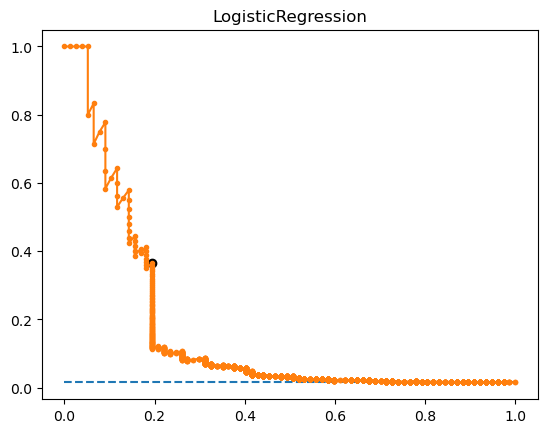

In [71]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

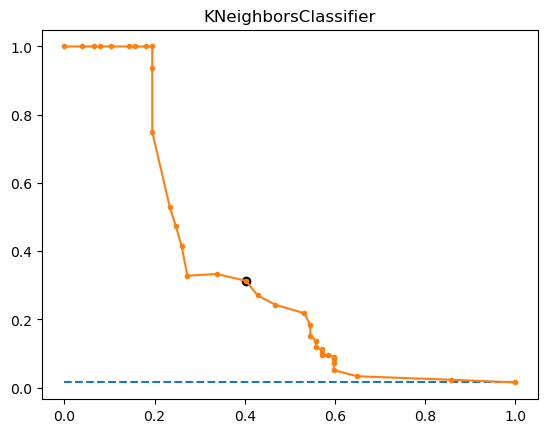

In [72]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix_2], p2[ix_2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [73]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_thresholds[ix_2]).astype('int')

Отчёт о классификации при оптимальном значении порога (LogisticRegression)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4923
           1       0.35      0.18      0.24        77

    accuracy                           0.98      5000
   macro avg       0.67      0.59      0.62      5000
weighted avg       0.98      0.98      0.98      5000



Отчёт о классификации при оптимальном значении порога (KNeighborsClassifier)

In [75]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4923
           1       0.33      0.34      0.34        77

    accuracy                           0.98      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.98      0.98      0.98      5000



# Доделать первое задание (визуализировать границу принятия решений при разных значениях порога)

№2 Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.